In [2]:
import numpy as np
from sklearn import svm
from scipy.sparse import *
from sklearn.ensemble import RandomForestClassifier as RFC
import time
import pickle

%matplotlib
%matplotlib inline

import matplotlib.pyplot as plt

Using matplotlib backend: Qt5Agg


In [5]:
loader=np.load('data/Training.npz')
X_train = csc_matrix( (loader['training_matrix_data'], loader['training_matrix_indices'], loader['training_matrix_indptr']), shape=loader['training_matrix_shape'])
y_train=loader['is_for_home']
loader2=np.load('data/CV.npz')
X_CV = csc_matrix( (loader2['CV_matrix_data'], loader2['CV_matrix_indices'], loader2['CV_matrix_indptr']), shape=loader2['CV_matrix_shape'])
y_CV=loader2['is_for_home']

In [7]:
deps = [25,50,75,100,125]
n_t = [5,10,15,20,30, 50,75, 100]

In [10]:
for jd in deps:
    for jt in n_t:
        print('Processing forests with ' + str(jt) + ' trees and depth ' + str(jd))
        myrfc=RFC(n_estimators=jt,criterion="entropy",max_depth=jd )
        myrfc.fit(X_train,y_train)
        fn = 'Forest_'+str(jt)+'_'+str(jd)
        with open(fn, 'wb') as output:
            pickle.dump(myrfc,output)


Processing forests with 5 trees and depth 25
Processing forests with 10 trees and depth 25
Processing forests with 15 trees and depth 25
Processing forests with 20 trees and depth 25
Processing forests with 30 trees and depth 25
Processing forests with 50 trees and depth 25
Processing forests with 75 trees and depth 25
Processing forests with 100 trees and depth 25
Processing forests with 5 trees and depth 50
Processing forests with 10 trees and depth 50
Processing forests with 15 trees and depth 50
Processing forests with 20 trees and depth 50
Processing forests with 30 trees and depth 50
Processing forests with 50 trees and depth 50
Processing forests with 75 trees and depth 50
Processing forests with 100 trees and depth 50
Processing forests with 5 trees and depth 75
Processing forests with 10 trees and depth 75
Processing forests with 15 trees and depth 75
Processing forests with 20 trees and depth 75
Processing forests with 30 trees and depth 75
Processing forests with 50 trees an

In [8]:
tscores=[]
cvscores=[]
for jd in deps:
    for jt in n_t:
        print('Scores for forests with ' + str(jt) + ' trees and depth ' + str(jd))
        fn = 'Forest_'+str(jt)+'_'+str(jd)
        with open(fn, 'rb') as input:
            myrfc = pickle.load(input)
            tscores.append(myrfc.score(X_train,y_train))
            cvscores.append(myrfc.score(X_CV,y_CV))
            print(myrfc.score(X_train,y_train),myrfc.score(X_CV,y_CV))

Scores for forests with 5 trees and depth 25
0.600246588051 0.558119094704
Scores for forests with 10 trees and depth 25
0.623916599526 0.566578773896
Scores for forests with 15 trees and depth 25
0.643509363022 0.576942796455
Scores for forests with 20 trees and depth 25
0.64659781733 0.577931590127
Scores for forests with 30 trees and depth 25
0.653604824337 0.583571376254
Scores for forests with 50 trees and depth 25
0.664701286653 0.589614004248
Scores for forests with 75 trees and depth 25
0.660123538172 0.587270197026
Scores for forests with 100 trees and depth 25
0.660965843893 0.587636416905
Scores for forests with 5 trees and depth 50
0.698527796089 0.590236578041
Scores for forests with 10 trees and depth 50
0.736492590151 0.596975023804
Scores for forests with 15 trees and depth 50
0.77095388071 0.618581996631
Scores for forests with 20 trees and depth 50
0.785297492615 0.616860763202
Scores for forests with 30 trees and depth 50
0.795344124612 0.623452721014
Scores for fore

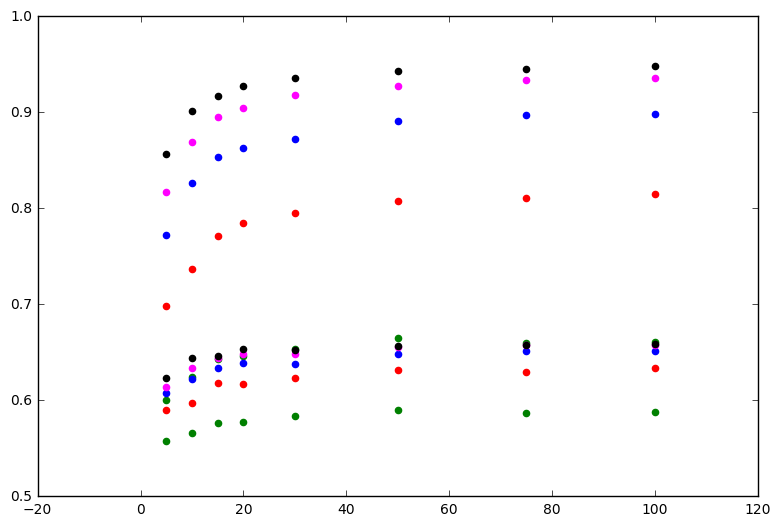

In [9]:
fig = plt.figure()
ax = fig.add_axes([.1,.1,1.2,1.2])
ax.scatter(n_t,tscores[0:8],color="green")
ax.scatter(n_t,cvscores[0:8], color="green")
ax.scatter(n_t,tscores[8:16],color="red")
ax.scatter(n_t,cvscores[8:16], color="red")
ax.scatter(n_t,tscores[16:24],color="blue")
ax.scatter(n_t,cvscores[16:24], color="blue")
ax.scatter(n_t,tscores[24:32],color="magenta")
ax.scatter(n_t,cvscores[24:32], color="magenta")
ax.scatter(n_t,tscores[32:40],color="black")
ax.scatter(n_t,cvscores[32:40], color="black")
plt.show()

In [12]:
max(cvscores)

0.65846334139017071